Please fill out the feedback form:

https://docs.google.com/forms/d/e/1FAIpQLScORHXiMgjvLJDl35SFPA1uXF8J8kSMxV6SkcZSQBRvyhj0CA/viewform?usp=sf_link

And now for something completely different...

# Python for mathematics, science and engineering
https://scipy.org/

## Numpy
`numpy` is a `python` package

* linear algebra, Fourier transform and random numbers
* easy-to-use matrices, arrays, tensors
* optimized
* C/C++/Fortran integration is possible (if optimization is not enough)

<div align=center><i>"Numpy is the MatLab of python!"</i></div>

In [1]:
import numpy

We will use the following for plotting.

In [2]:
%matplotlib inline
import matplotlib.pyplot

Numpy uses an underlying [BLAS](http://www.netlib.org/blas/) library, just as MatLab does. These libraries harvests the vectorization.
* Anaconda uses IntelMKL (Intel's proprietary math library)
* If you install numpy manually, and you have previously installed [OpenBLAS](http://www.openblas.net/) (free, opensource), then numpy will use that.

In [3]:
numpy.show_config()

blas_mkl_info:
    libraries = ['mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['D:/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['D:/Anaconda3\\Library\\include']
blas_opt_info:
    libraries = ['mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['D:/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['D:/Anaconda3\\Library\\include']
lapack_mkl_info:
    libraries = ['mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['D:/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['D:/Anaconda3\\Library\\include']
lapack_opt_info:
    libraries = ['mkl_core_dll', 'mkl_intel_lp64_dll', 'mkl_intel_thread_dll']
    library_dirs = ['D:/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', N

### First steps

The core object of `numpy` is the `numpy.ndarray` (_$n$-dimensional array_).

In [4]:
A = numpy.array([[1, 2], [3, 4]])

print(A.shape, A.dtype)

(2, 2) int32


The `shape` is a tuple with the length of the number of dimensions. The i<sup>th</sup> element of the `shape` is the length of dimension $i$.

The above is a $2\times 2$ matrix. You can access its elements with `[]`. One index in one bracket, or with several indices.

In [5]:
print(A[0, 0], A[0, 1], A[1, 0], A[1, 1])
print(A[0])
print(A[0][0])

1 2 3 4
[1 2]
1


In general, an $n$-dimensional array requires $n$ indices to access its scalar elements.

In [6]:
B = numpy.array([[[1, 2, 3],[4, 5, 6]]])
print(B.shape)
print()
print(B[0])
print(B[0, 1])
print(B[0, 1, 2])

(1, 2, 3)

[[1 2 3]
 [4 5 6]]
[4 5 6]
6


### under the hood

The default array representation is C style ([row-major](https://en.wikipedia.org/wiki/Row-_and_column-major_order)) indexing. But you cannot rely on the representation, it is advised not to use the low level C arrays!

In [7]:
print(B.strides)
print(B.flags)

(24, 12, 4)
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False


### Operations on arrays

Arithmetic operators are overloaded, they act element-wise.

In [8]:
P = A > 2
print(P)
print(P.dtype)

[[False False]
 [ True  True]]
bool


In [9]:
print(A + A)
print()
print(A * A)

[[2 4]
 [6 8]]

[[ 1  4]
 [ 9 16]]


In [10]:
print(numpy.exp(A))
print(2**A)
print(1/A)

[[  2.71828183   7.3890561 ]
 [ 20.08553692  54.59815003]]
[[ 2  4]
 [ 8 16]]
[[ 1.          0.5       ]
 [ 0.33333333  0.25      ]]


Functions like `dot`, `inv`, `pinv` are not element wise, but matrix algebraic operations.

In [12]:
print(A.dot(A))
print()
print(numpy.linalg.inv(A))

[[ 7 10]
 [15 22]]

[[-2.   1. ]
 [ 1.5 -0.5]]


Also, there is a `matrix` class for which `*` acts as a matrix product.

In [14]:
M = numpy.matrix([[1, 2], [3, 4]])
print(numpy.multiply(M, M))
print()
print(M * M)

[[ 1  4]
 [ 9 16]]

[[ 7 10]
 [15 22]]


### Casting
In `python` float and integer representation is fixed, in `numpy` you can use C types.

In [15]:
P.astype(int)

array([[0, 0],
       [1, 1]])

In [16]:
(-P.astype(int)).astype("uint32")

array([[         0,          0],
       [4294967295, 4294967295]], dtype=uint32)

In [17]:
numpy.array([[1, 2], [3, 4]], dtype="float32")

array([[ 1.,  2.],
       [ 3.,  4.]], dtype=float32)

In [18]:
T = numpy.array(['a', 'text'])
print(T)
print(T.shape)

['a' 'text']
(2,)


Directly converts strings to numbers

In [19]:
numpy.float32('-10')

-10.0

Use the cast on arrays

In [20]:
numpy.array(['10', '20'], dtype="float32")

array([ 10.,  20.], dtype=float32)

### Slicing, advanced indexing
One can slice a sub-array from an array.

Use `:` for retrieving the full size along that dimension.

In [21]:
A = numpy.array([[1, 2, 3], [4, 5, 6]])
print(A[0])
print(A[0, :]) # first row
print(A[:, 0])  # first column

[1 2 3]
[1 2 3]
[1 4]


These are 1D vectors, neither $1\times n$ nor $n\times1$ matrices!

In [24]:
print(A[0, :].shape, A[:, 0].shape)

(3,) (2,)


In [23]:
print(B)
print(B[:, 1, :])
print(B[:, 1, :].shape)

[[[1 2 3]
  [4 5 6]]]
[[4 5 6]]
(1, 3)


All python range indexing also work, like reverse:

In [26]:
print(A)
print(A[:, ::-1])
print(A[::-1, :])
print(A[:, ::2])

[[1 2 3]
 [4 5 6]]
[[3 2 1]
 [6 5 4]]
[[4 5 6]
 [1 2 3]]
[[1 3]
 [4 6]]


_Advanced indexing_ is when the index is a list.

In [29]:
print(numpy.array(range(5)))
print(numpy.array(range(5))[[0, 2]])
print()
print(B)
print(B[0, 0, [0,2]])
B[0, :, [0,2]] # first and third "column"

[0 1 2 3 4]
[0 2]

[[[1 2 3]
  [4 5 6]]]
[1 3]


array([[1, 4],
       [3, 6]])

If indices are all lists:
<div align=center>B[$i_1$, $i_2$, $\ldots$].shape = (len($i_1$), len($i_2$), $\ldots$)</div>

The size of a particular dimension remains when the corresponding index is a colon (`:`).

If an index is a scalar then that dimension disappears from the shape of the output.

One can use a one-length list in advanced indexing. In that case, the number of dimensions remains but the size of that dimension becomes one.

In [30]:
print(B[:, :, 2].shape)
print(B[:, :, 2])
print()
print(B[:, :, [2]].shape)
print(B[:, :, [2]])

(1, 2)
[[3 6]]

(1, 2, 1)
[[[3]
  [6]]]


### Change shape
The shape of an array can be modified with `reshape`, as long as the number of elements remains the same. The underlying elements are unchanged and not copied in the memory.

In [31]:
print(B.reshape((2, 3)))
print()
print(B.reshape((3, 2)))

[[1 2 3]
 [4 5 6]]

[[1 2]
 [3 4]
 [5 6]]


In [32]:
numpy.array(range(6)).reshape((2, 3))

array([[0, 1, 2],
       [3, 4, 5]])

The size `-1` can be used to span the resulted array as much as it can in that dimension.

In [33]:
X = numpy.array(range(12)).reshape((2, -1, 2))
print("shape", X.shape, ":")
print(X)

shape (2, 3, 2) :
[[[ 0  1]
  [ 2  3]
  [ 4  5]]

 [[ 6  7]
  [ 8  9]
  [10 11]]]


In [38]:
X.reshape((6, -1))

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

`resize` deletes elements or fills with zeros but it works only _inplace_.

In [40]:
Y = X.copy()
Y.resize((5, 3))
print(Y)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [ 0  0  0]]


However, `numpy.resize` (not a member) works differently

In [41]:
numpy.resize(X, (5, 3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [ 0,  1,  2]])

### Constucting arrays

useful functions:
* `arange`: range
* `linspace`: equally divided interval
* `ones`, `ones_like`, array filled with ones
* `zeros`, `zeros_like`, array filled with zeros
* `eye`: identity matrix, only 2D

`numpy.ones_like()` ans `numpy.zeros_like()` keeps shape and `dtype`!

In [42]:
R = numpy.arange(10, dtype="int8")
print(R)
R = R.reshape((1, -1))
print(R)
R = R.reshape((-1, 1))
print(R)
numpy.zeros_like(R)

[0 1 2 3 4 5 6 7 8 9]
[[0 1 2 3 4 5 6 7 8 9]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int8)

In [43]:
print(numpy.eye(5))
print(numpy.eye(5, dtype=bool))

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
[[ True False False False False]
 [False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [False False False False  True]]


there is no `numpy.eye_like`, but you can use the following:

In [44]:
numpy.eye(*A.shape, dtype=A.dtype)

array([[1, 0, 0],
       [0, 1, 0]])

#### Concatenation
The axis to concatenate sums the size of the dimensions in that axis. The other axis should be all equal.

In [46]:
print(A)
print(B)
print()
print(numpy.concatenate([A, A], axis=1))
print(numpy.concatenate([A, A], axis=0))
print(numpy.concatenate([B, B], axis=2))

[[1 2 3]
 [4 5 6]]
[[[1 2 3]
  [4 5 6]]]

[[1 2 3 1 2 3]
 [4 5 6 4 5 6]]
[[1 2 3]
 [4 5 6]
 [1 2 3]
 [4 5 6]]
[[[1 2 3 1 2 3]
  [4 5 6 4 5 6]]]


In [48]:
print(numpy.concatenate([numpy.ones((1,2,3)), numpy.ones((1,5,3)), numpy.ones((1,3,3))], axis=1))
print(numpy.concatenate([numpy.ones((1,2,3)), numpy.ones((1,5,3)), numpy.ones((1,3,3))], axis=1).shape)

[[[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]]
(1, 10, 3)


Block matrix

In [49]:
numpy.concatenate([numpy.concatenate([numpy.ones((2,2)), numpy.zeros((2,2))], axis=1), numpy.concatenate([numpy.zeros((2,2)), numpy.ones((2,2))], axis=1)], axis=0)

array([[ 1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  1.],
       [ 0.,  0.,  1.,  1.]])

#### Stack

`stack` puts the arrays next to each other, using a new dimension. Each array must have the same shape.

In [50]:
for i in [0, 1, 2]:
    X = numpy.stack([numpy.ones((3,2)), numpy.zeros((3,2))], axis=i)
    print(X)
    print(X.shape)
    print()

[[[ 1.  1.]
  [ 1.  1.]
  [ 1.  1.]]

 [[ 0.  0.]
  [ 0.  0.]
  [ 0.  0.]]]
(2, 3, 2)

[[[ 1.  1.]
  [ 0.  0.]]

 [[ 1.  1.]
  [ 0.  0.]]

 [[ 1.  1.]
  [ 0.  0.]]]
(3, 2, 2)

[[[ 1.  0.]
  [ 1.  0.]]

 [[ 1.  0.]
  [ 1.  0.]]

 [[ 1.  0.]
  [ 1.  0.]]]
(3, 2, 2)



### Iteration
By default, iteration takes place in the first (outermost) dimension.

In [51]:
for row in A:
    print(row)

[1 2 3]
[4 5 6]


But you can slice the desired elements for a loop.

In [52]:
print(B[0, 0, :])
print()
for x in B[0, 0, :]:
    print(x)

[1 2 3]

1
2
3


In [54]:
print(B[0, 0, :].reshape((1, 1, -1)))
print()
for row in B[0, 0, :].reshape((1, 1, -1)):
    print(row)

[[[1 2 3]]]

[[1 2 3]]


You can iterate through the elements themselves.

In [55]:
for a in B.flat:
    print(a)

1
2
3
4
5
6


### Broadcasting
One can calculate with uneven shaped arrays if their shapes satisfy certain requirements.

For example a $1\times 1$ array can be multiplied with matrices, just like a scalars times a matrix.

In [59]:
s = 2.0 * numpy.ones((1,1))
print(s)
s*A

[[ 2.]]


array([[  2.,   4.,   6.],
       [  8.,  10.,  12.]])

Also, you can multiply a one-length vector to a matrix, or a zero dimensional array (scalar) to any dimensional array.

In [60]:
numpy.ones((2,3)) + numpy.ones((3,2))

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

This behavior is defined via _broadcasting_. If an array array has a dimension of length one, then it can be _broadcasted_, which means that it can span as much as the operation requires (operation other than indexing).

In [67]:
print(numpy.arange(3).reshape((1,3)))
print(numpy.arange(3).reshape((1,3)) + numpy.ones((3,3)))
print(numpy.arange(3).reshape((3,1)) + numpy.ones((3,3)))

[[0 1 2]]
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]
[[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]]


More than one dimension can be broadcasted at a time.

In [70]:
print(numpy.arange(3).reshape((1,3,1)) + numpy.ones((3,3,3)))

[[[ 1.  1.  1.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]

 [[ 1.  1.  1.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]

 [[ 1.  1.  1.]
  [ 2.  2.  2.]
  [ 3.  3.  3.]]]


#### Theory

Let's say that an array has a shape `(1, 3, 1)`, which means that it can be broadcasted in the first and third dimension.
Then the index triple `[x, y, z]` accesses its elements as `[0, y, 0]`. In one word, broadcasted dimensions are omitted in indexing.

One can broadcast non-existent dimensions, like a one-dimensional array (vector) can be broadcasted together with a three dimensional array.

In terms of shapes: `(k,) + (i, j, k)` means that a vector plus a three dimensional array (of size i-by-j-by-k). The index `[i, j, k]` of the broadcasted vector degrades to `[k]`.

Let's denote the broadcasted dimensions with `None` and the regular dimensions with their size. For example shapes `(2,) + (3, 2, 2)` results the broadcast `(None, None, 2) + (3, 2, 2)`. False dimensions are prepended at the front, or in the place of 1-length dimensions.

<div align=center>`(2,) + (3, 2, 2) -> (None, None, 2) + (3, 2, 2) = (3, 2, 2)` <br>
but<br>
`(3,) + (3, 2, 2) -> (None, None, 3) + (3, 2, 2)`
</div>
and the latter is not compatible.

In [68]:
def test_broadcast(x, y):
    try:
        A = numpy.ones(x) + numpy.ones(y)
    except:
        return "WRONG"
    return A.shape

print(test_broadcast((3), (3,2,2)))
print(test_broadcast((2), (3,2,2)))
print(test_broadcast((3,1,1), (3,2,2)))

WRONG
(3, 2, 2)
(3, 2, 2)


You can force the broadcast if you allocate a dimension of length one at a certain dimension (via `reshape`) or explicitly with the keyword `None`.

In [71]:
(numpy.ones(3)[:, None, None] + numpy.ones((3,2,2))).shape

(3, 2, 2)

In shapes: `(3, None, None) + (3, 2, 2) = (3, 2, 2)`

In the former examples:
* `A1 = (1, 3) + (3, 3)` then the result can be expressed as `[i, j] = [0, j] + [i, j]` which means that the `[i, j]` index of the result is the sum of the `[0, j]` index of the first operand and the `[i, j]` index of the second operand.
* `A2 = (3, 1) + (3, 3)` results ` [i, j] = [i, 0] + [i, j]`
* and `A3 = (3,) + (3, 3)` results `[i, j] = [j] + [i, j]`

#### Example
One liner to produce a complex "grid".

In [72]:
numpy.arange(5)[:, None] + 1j*numpy.arange(5)[None, :]

array([[ 0.+0.j,  0.+1.j,  0.+2.j,  0.+3.j,  0.+4.j],
       [ 1.+0.j,  1.+1.j,  1.+2.j,  1.+3.j,  1.+4.j],
       [ 2.+0.j,  2.+1.j,  2.+2.j,  2.+3.j,  2.+4.j],
       [ 3.+0.j,  3.+1.j,  3.+2.j,  3.+3.j,  3.+4.j],
       [ 4.+0.j,  4.+1.j,  4.+2.j,  4.+3.j,  4.+4.j]])

Due to the default behavior, a vector behaves as a row vector and acts row-wise on a matrix.

`(n,) -> (None, n)`

In [73]:
numpy.arange(5) + numpy.zeros((5,5))

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.],
       [ 0.,  1.,  2.,  3.,  4.]])

This behavior does not apply to non-element-wise operations, like `dot` product.

### Reductions

Sum over an axis

In [74]:
Y = numpy.arange(24).reshape(2,3,4)
print(Y)
print("------------------")
print(Y.sum(axis=0))
print("------------------")
print(Y.sum(axis=1).sum(0))
print("------------------")
print(Y.sum())

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
------------------
[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]
------------------
[60 66 72 78]
------------------
276


This is a vector dot product (element-wise product and then sum):

In [75]:
def my_vec_dot(x, y):
    return (numpy.array(x)*numpy.array(y)).sum()

my_vec_dot([1, 2, 3], [1, 2, 3])

14

This is a matrix dot product:

In [76]:
def my_mat_dot(x, y):
    #            sum_j           x_{i, j,  -  }             y_{  - , j, k}
    return numpy.sum(numpy.array(x)[:, :, None]*numpy.array(y)[None, :, :], axis=1)

my_mat_dot([[1, 2], [3, 4]], [[1, 2], [3, 4]])

array([[ 7, 10],
       [15, 22]])

More about `ufunc`: https://docs.scipy.org/doc/numpy/reference/ufuncs.html

### Random numbers
`numpy.random.rand` Its arguments are the shape of the resulted random array of uniform $[0,1)$ elements. Its type is `float64`, you can cast it afterwards.

In [77]:
numpy.random.rand(2,3).astype("float32")

array([[ 0.2285407 ,  0.00377831,  0.69540322],
       [ 0.55448335,  0.17262603,  0.40753233]], dtype=float32)

Other distributions:

In [78]:
numpy.random.uniform(1,2,(2,2))

array([[ 1.03698901,  1.46911813],
       [ 1.1074024 ,  1.41385613]])

In [79]:
numpy.random.standard_normal(10)

array([-0.92130528, -0.71547789,  0.78792231, -2.56251015, -0.45566089,
       -0.32359884,  0.14598562,  0.69475621,  0.16921362,  0.06647448])

In [80]:
numpy.random.normal(0, 1, size=(1,10))

array([[-0.01595886,  0.94523974, -1.08179291,  0.93062126,  0.3135392 ,
         0.29231639,  0.78570705, -0.82170913, -0.16213233, -0.15556317]])

Descrete randoms:

In [81]:
print(numpy.random.choice(["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"], 5, replace=False))

['5' '6' '4' 'Q' '2']


`choice` accepts custom probabilities:

In [89]:
numpy.random.choice(range(1,7), 10, p=[0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

array([4, 3, 2, 6, 3, 4, 1, 6, 5, 6])

In [94]:
print(numpy.random.permutation(["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]))

['7' 'A' 'J' '3' '10' '5' '8' 'K' 'Q' '9' '2' '4' '6']


`permutation` permutes the first (outermost) dimension.

In [113]:
print(numpy.random.permutation(numpy.arange(9).reshape((3, 3))))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


## Excersises
### 1.
Implemet softmax. Softmax is a vector-vector function such that
$$
x_i \mapsto \frac{\exp(x_i)}{\sum_{j=1}^n \exp(x_j)}
$$
Avoid using for loops, use vectorization. The solution below is a _bad_ solution.

In [115]:
def softmax(X):
    return numpy.array([numpy.exp(x)/sum(numpy.exp(y) for y in X) for x in X])

def softmax2(X):
    exp = numpy.exp(X)
    return exp/exp.sum()

print(softmax([-1,0,1]))
print(softmax2([-1,0,1]))

[ 0.09003057  0.24472847  0.66524096]
[ 0.09003057  0.24472847  0.66524096]


### 2.
Write a function which has one parameter, a 2D array and it returns a vector of row-wise Euclidean norms of the input. Use `numpy` operations and vectorization, avoid `for` loops. The solution below is a _bad_ solution.

In [125]:
def rowwise_norm(X):
    def my_dot(x, y):
        result = 0.0
        for i in range(len(x)):
            result += x[i] * y[i]
        return result
    return numpy.array([numpy.sqrt(my_dot(x, x)) for x in X])

def rowwise_norm2(X):
    return numpy.sqrt(numpy.sum(numpy.square(X), axis=1))

X = numpy.arange(5)[:, None]*numpy.ones((5, 3));
print(X)
print()
print(rowwise_norm(X))
print(rowwise_norm2(X))
print()
print(rowwise_norm([[1], [-1], [1], [-1]]))
print(rowwise_norm2([[1], [-1], [1], [-1]]))

[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 3.  3.  3.]
 [ 4.  4.  4.]]

[ 0.          1.73205081  3.46410162  5.19615242  6.92820323]
[ 0.          1.73205081  3.46410162  5.19615242  6.92820323]

[ 1.  1.  1.  1.]
[ 1.  1.  1.  1.]


### 3.
Write a function which has one parameter, a positive integer $n$, and returns an $n\times n$ array of $\pm1$ values like a chessboard: $M_{i,j} = (-1)^{i+j}$.

Use `numpy` operations, avoid `for` loops!

In [148]:
def chessboard(n):
    return numpy.array([[(-1)**(i + j) for j in range(n)] for i in range(n)])

def chessboard2(n):
    m = numpy.matrix((-1)**numpy.arange(n))
    return m.T * m

print(chessboard(6))
print()
print(chessboard2(6))

[[ 1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1]]

[[ 1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1 -1]
 [-1  1 -1  1 -1  1]]


### 4.*
Write a function which numerically derivates a $\mathbb{R}\mapsto\mathbb{R}$ function. Use the forward finite difference.

The input is a 1D array of function values, and optionally a 1D vector of abscissa values. If not provided then the abscissa values are unit steps.

The result is a 1D array with the length of one less than the input array.

Use `numpy` operations instead of `for` loop in contrast to the solution below.

In [164]:
def derivate(f, x=None):
    if x is None:
        x = numpy.arange(len(f))
    return numpy.array([(f[i+1] - f[i]) / (x[i+1] - x[i]) for i in range(len(x) - 1)])

def derivate2(f, x=None):
    if x is None:
        x = numpy.arange(len(f))
    return numpy.diff(f) / numpy.diff(x)

print(derivate(numpy.arange(-10, 10, 0.5)**2))
print()
print(derivate2(numpy.arange(-10, 10, 0.5)**2))

[-9.75 -9.25 -8.75 -8.25 -7.75 -7.25 -6.75 -6.25 -5.75 -5.25 -4.75 -4.25
 -3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75
  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75  6.25  6.75  7.25  7.75
  8.25  8.75  9.25]

[-9.75 -9.25 -8.75 -8.25 -7.75 -7.25 -6.75 -6.25 -5.75 -5.25 -4.75 -4.25
 -3.75 -3.25 -2.75 -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75
  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75  6.25  6.75  7.25  7.75
  8.25  8.75  9.25]


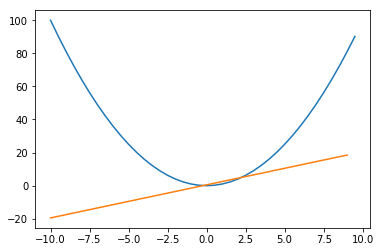

In [163]:
x = numpy.arange(-10, 10, 0.5)
matplotlib.pyplot.plot(x, x**2)
matplotlib.pyplot.plot(x[:-1], derivate(x**2, x))

### 4. b)
Make a random (1D) grid and use that as abscissa values!

### 5.*
Implement the [Horner's method](https://en.wikipedia.org/wiki/Horner%27s_method#Description_of_the_algorithm) for evaluating polynomials. The first input is a 1D array of numbers, the coefficients, from the constant coefficient to the highest order coefficent. The second input is the variable $x$ to subsitute. The function should work for all type of variables: numbers, arrays; the output should be the same type array as the input, containing the elementwise polynomial values.

In [ ]:
def horner(C, x):
    y = numpy.zeros_like(x)
    # YOUR CODE COMES HERE
    return y

In [ ]:
C = [2, 0, 1] # 2 + x^2
print(horner(C, 3))
print(horner(C, [3, 3]))
print(horner(C, numpy.arange(9).reshape((3,3))))

With a slight modofication, you can implement [matrix polinomials](https://en.wikipedia.org/wiki/Matrix_polynomial)!

### 6.*
Plot the $z\mapsto \exp(z)$ complex function on $[-2, 2]\times i [-2, 2]$. Use `matplotlib.pyplot.imshow` and the red and green color channgels for real and imaginary parts.